# Zbiór danych
Zbiór danych *kredyt.csv* zawiera informacje dotyczące wniosków o kredyt hipoteczny w penym banku. Poszczególne kolumny reprezentują różne cechy związane z każdym wnioskiem:

- Loan_ID: Unikalny identyfikator każdego wniosku o kredyt.
- Gender: Płeć osoby składającej wniosek (mężczyzna/kobieta).
- Married: Status małżeński (żonaty/nie).
- Dependents: Liczba osób na utrzymaniu osoby składającej wniosek.
- Education: Poziom edukacji osoby składającej wniosek.
- Self_Employed: Czy osoba składająca wniosek jest samozatrudniona (tak/nie).
- ApplicantIncome: Dochód osoby składającej wniosek.
- CoapplicantIncome: Dochód współmałżonka lub współmałżonki osoby składającej wniosek.
- LoanAmount: Kwota kredytu hipotecznego wnioskowana przez osobę składającą wniosek.
- Loan_Amount_Term: Okres kredytowania (w miesiącach).
- Credit_History: Historia kredytowa (czy osoba składająca wniosek miała wcześniej kredyt hipoteczny, 1 - tak, 0 - nie).
- Property_Area: Lokalizacja nieruchomości (miejska/półmiejska/wiejska).
- Loan_Status: Status kredytu (zatwierdzony/niezatwierdzony).

# Zadanie
Przeprowadź eksploracyjną analizę danych zawartych w zbiorze *kredyt.csv*.
W tym celu wykonaj m.in. nastepujące kroki:
- zaimportj potrzebne biblioteki
- wczytaj zbiór danych
- scharakteryzuj zbiór (kształt, rodzaj zmiennych, statystyki opisowe)
- sprwdź, czy w zbiorze są jakieś braki, jeśli tak zadecyduj co z nimi zrobić
- postaw minimum 3 pytania badawcze / hipotezy badawcze; pytania badawcze powinny być złożone (np. hipoteza badawcza: "kredyt przyznawany jest częściej mężczyzną niż kobietą" jest zbyt trwialna); za pomocą wykresów określ, czy postawione hipotezy były słuszne czy nie
- podsumuj jakie wnioski można wyciągnąć po przeprowadzonej analizie  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/kredyt.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# charakteryzacja
print("Kształt zbioru danych:", df.shape)
print("\nInformacje o zmiennych:")
print(df.info())
print("\nStatystyki opisowe:")
print(df.describe())

Kształt zbioru danych: (614, 13)

Informacje o zmiennych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

Statystyki opisowe:
       ApplicantIncome  Coap

In [ ]:
# braki
print("\nSuma braków danych w poszczególnych kolumnach:")
print(df.isnull().sum())

# uzupełnienie braków modą z poszczególnych kolmun
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

print("Suma braków danych po uzupełnieniu:")
print(df.isnull().sum())



Suma braków danych w poszczególnych kolumnach:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Suma braków danych po uzupełnieniu:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


# HIPOTEZY
1. Status małżeński wpływa na szansę uzyskania kredytu.
2. Wykształceni mężczyźni mają większą szansę na uzyskanie kredytu niż wykształcone kobiety.
3. Miejsce zamieszkania samozatrudnionych meżczyzn ma wpływ na uzyskanie kredytu.
4. Osoby w związku małżeńskim które nie miały wcześniej kredytu hipotecznego dostają wyższą kwotę kredytu niż osoby w związku małżeńskim ale z historią kredytową




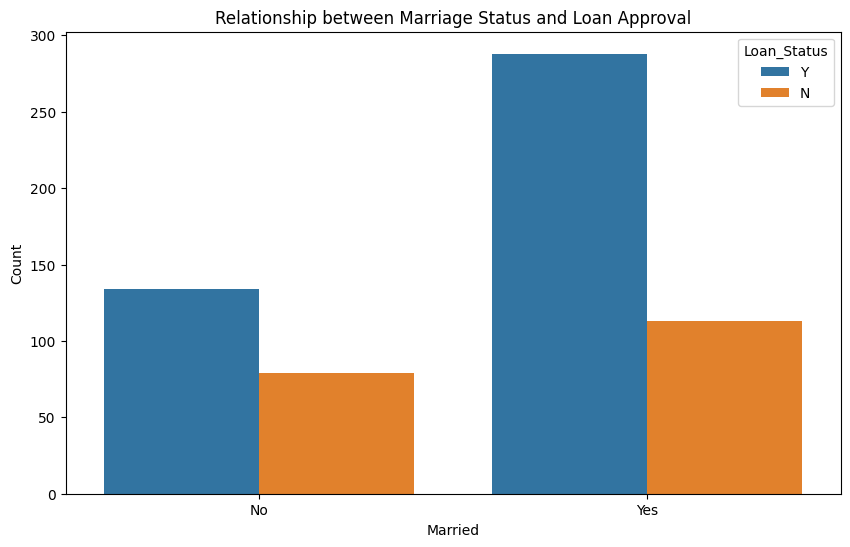

In [ ]:
# Analiza statusu małżeńskiego i uzyskania kredytu
plt.figure(figsize=(10, 6))
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.title('Relationship between Marriage Status and Loan Approval')
plt.xlabel('Married')
plt.ylabel('Count')
plt.show()

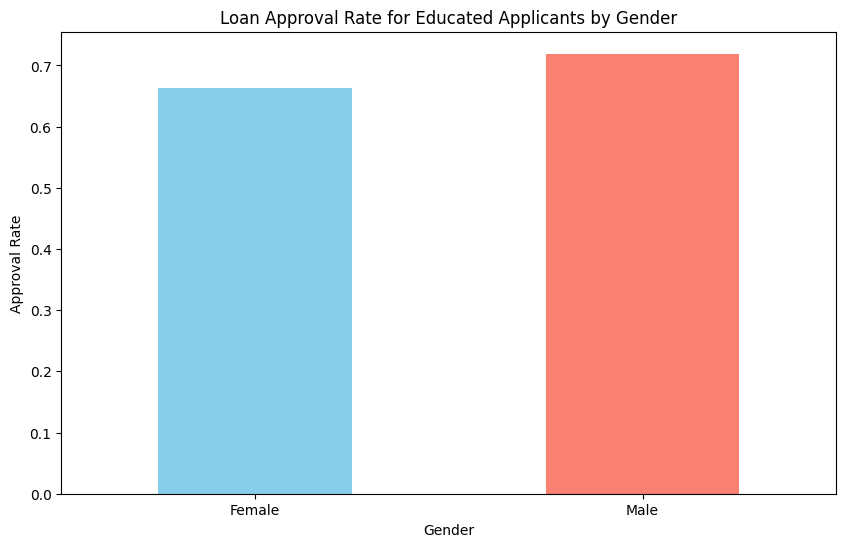

In [ ]:
# Analiza hipotezy: wykształceni mężczyźni mają większą szansę na uzyskanie kredytu niż wykształcone kobiety
educated_applicants = df[df['Education'] == 'Graduate']

approved_loans = educated_applicants.groupby(['Gender', 'Loan_Status']).size().unstack()
approved_loans['Approval_Rate'] = approved_loans['Y'] / (approved_loans['Y'] + approved_loans['N'])

plt.figure(figsize=(10, 6))
approved_loans['Approval_Rate'].plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Loan Approval Rate for Educated Applicants by Gender')
plt.xlabel('Gender')
plt.ylabel('Approval Rate')
plt.xticks(rotation=0)
plt.show()

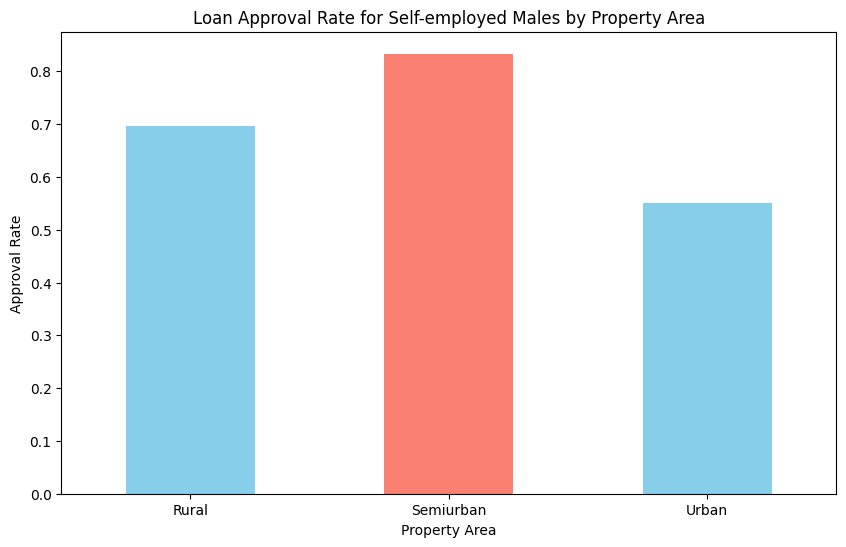

In [ ]:
# Analiza hipotezy: Miejsce zamieszkania samozatrudnionych meżczyzn ma wpływ na uzyskanie kredytu.
self_employed_male = df[(df['Gender'] == 'Male') & (df['Self_Employed'] == 'Yes')]

approved_loans = self_employed_male.groupby(['Property_Area', 'Loan_Status']).size().unstack()
approved_loans['Approval_Rate'] = approved_loans['Y'] / (approved_loans['Y'] + approved_loans['N'])

plt.figure(figsize=(10, 6))
approved_loans['Approval_Rate'].plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Loan Approval Rate for Self-employed Males by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Approval Rate')
plt.xticks(rotation=0)
plt.show()

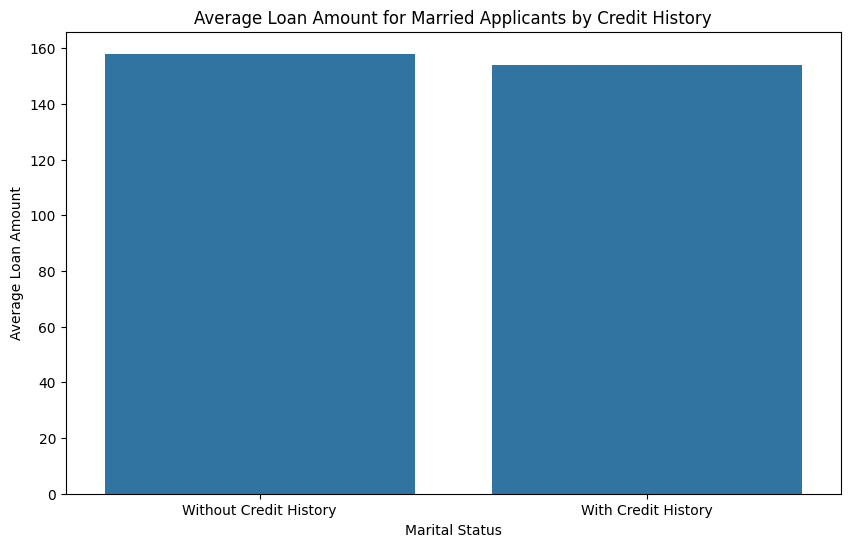

In [ ]:
# Analiza hipotezy: osoby w związku małżeńskim które nie miały wcześniej kredytu hipotecznego dostają wyższą kwotę kredytu niż osoby w związku małżeńskim ale z historią kredytową
married_applicants = df[df['Married'] == 'Yes']

married_without_credit_history = married_applicants[(married_applicants['Credit_History'] == 0)]

married_with_credit_history = married_applicants[(married_applicants['Credit_History'] == 1)]

avg_loan_amount_no_credit = married_without_credit_history['LoanAmount'].mean()

avg_loan_amount_with_credit = married_with_credit_history['LoanAmount'].mean()

data_to_plot = pd.DataFrame({'Marital Status': ['Without Credit History', 'With Credit History'],
                                 'Average Loan Amount': [avg_loan_amount_no_credit, avg_loan_amount_with_credit]})

plt.figure(figsize=(10, 6))
sns.barplot(x='Marital Status', y='Average Loan Amount', data=data_to_plot)
plt.title('Average Loan Amount for Married Applicants by Credit History')
plt.xlabel('Marital Status')
plt.ylabel('Average Loan Amount')
plt.show()

Podsumowanie:
1. Osoby zamężne mają tendencję do częstszego uzyskiwania kredytu niż osoby niezamężne.
2. Na podstawie powyższego wykresu można stwierdzić, że wykształceni mężczyźni częściej dostają kredyt niż wykształcone kobiety. Potwierdza to słuszność założonej hipotezy
3. Na podstawie powyższego wykresu można stwierdzić, że samozatrudnieni mężczyźni mieszkający na przedmieściach najczęściej mają przyznawany kredyt, a najrzadziej Ci mieszkający w mieście. Można więc uznać poprawność hipotezy, że dla badanej grupy miejsce zamieszkania ma wpływ na przyznanie kredytu.
4. Na podstawie poniższego wykresu można stwierdzić poprawność założonej hipotezy. Osoby będące w związku małżeńskim bez historii kredytowej mają nieznacznie większe szanse na dostanie kredytu niż osoby z historią kredytową